# Amazing ML journey with Stan    
Welcome! Let me show you around on this amazing experience.   
FOR THE LOVE OF GOD DO NOT JUST RUN THE WHOLE THING!    


## 1. Data processing

#### The path    
First, make sure that you have created a .py file containing variable AUDIO_DATA_PATH with the path to the audio data, pointing to AUDIO.

In [1]:
import paths
# Create a .py file containing variable AUDIO_DATA_PATH with the path to the audio data, pointing to AUDIO
AUDIO_DATA_PATH = paths.AUDIO_DATA_PATH
print(AUDIO_DATA_PATH)
# The structure of the data folder should be as follows:

#         ↓   The path should be pointing to this folder
# data/AUDIO/
#           FAKE
#           REAL

data/AUDIO


### Imports

In [2]:
# Imports go brrrrrr
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
import wave
import cv2
import matplotlib.pyplot as plt
import sklearn
import scipy.io.wavfile as wav

from keras import layers
from keras import models
from IPython import display
from pydub import AudioSegment

from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split


c:\Users\wasil\anaconda3\envs\ml01\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


## 2. Obama Training

### Splitting data into train, test, and validation sets

In [3]:
image_size = (128, 128)
validation_split = 0.2
seed_train_validation = 3
shuffle_value = True

train_ds_obama = tf.keras.utils.image_dataset_from_directory(
    directory='data/SEPARATED/IMAGES/OBAMA/TRAINING',
    image_size=image_size,
    validation_split=validation_split,
    subset="training",
    seed=seed_train_validation,
    color_mode='rgb', 
    shuffle=shuffle_value
)

val_ds_obama = tf.keras.utils.image_dataset_from_directory(
    directory='data/SEPARATED/IMAGES/OBAMA/TRAINING',
    image_size=image_size,
    validation_split=validation_split,
    subset="validation",
    seed=seed_train_validation,
    color_mode="rgb",
    shuffle=shuffle_value
)


test_ds_obama = tf.keras.utils.image_dataset_from_directory(
    directory='data/SEPARATED/IMAGES/OBAMA/TEST',
    image_size=image_size,
    seed=seed_train_validation,
    color_mode='rgb',
    shuffle=shuffle_value
)

# number of batches in the validation set
val_batches_obama = tf.data.experimental.cardinality(val_ds_obama)



Found 3744 files belonging to 2 classes.
Using 2996 files for training.
Found 3744 files belonging to 2 classes.
Using 748 files for validation.
Found 392 files belonging to 2 classes.


In [4]:
train_ds_taylor = tf.keras.utils.image_dataset_from_directory(
    directory='data/SEPARATED/IMAGES/TAYLOR/TRAINING',
    image_size=image_size,
    validation_split=validation_split,
    subset="training",
    seed=seed_train_validation,
    color_mode='rgb', # normal matrix multiplication is hard enough
    shuffle=shuffle_value
)

val_ds_taylor = tf.keras.utils.image_dataset_from_directory(
    directory='data/SEPARATED/IMAGES/TAYLOR/TRAINING',
    image_size=image_size,
    validation_split=validation_split,
    subset="validation",
    seed=seed_train_validation,
    color_mode='rgb',
    shuffle=shuffle_value
)


test_ds_taylor = tf.keras.utils.image_dataset_from_directory(
    directory='data/SEPARATED/IMAGES/TAYLOR/TEST',
    image_size=image_size,
    seed=seed_train_validation,
    color_mode='rgb',
    shuffle=shuffle_value
)

# number of batches in the validation set
val_batches_taylor = tf.data.experimental.cardinality(val_ds_taylor)

Found 4039 files belonging to 2 classes.
Using 3232 files for training.
Found 4039 files belonging to 2 classes.
Using 807 files for validation.
Found 517 files belonging to 2 classes.


## Construct the model



In [5]:

model_obama = models.Sequential([
    # CNN

    # 32 filters with 3x3 kernels
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(128, 128, 3)),
    # 2x2 pool size so we downsample by 2
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Transform the output of the CNN (matrix) to a vector
    layers.Flatten(),
    
    # DENSEEEE
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # We don't really need that but it might help, idk

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # We don't really need that but it might help, idk

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2), 

    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2), 

    layers.Dense(1, activation='sigmoid')  # Sigmoid so we can set a threshold
])

optimizer = keras.optimizers.Adam()#learning_rate=0.0001) # We can set the learning rate here
model_obama.compile(optimizer=optimizer, # We can try different things here
              loss='binary_crossentropy', # Here also we can try something different
              metrics=['accuracy'])

model_obama.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

### Train the model

In [6]:
# train_ds, val_ds, test_ds 

epochs = 13
batch_size = 16

# Train the shit out of it
history_obama = model_obama.fit(
    train_ds_obama,
    validation_data=val_ds_obama,
    epochs=epochs,
    batch_size=batch_size
)

# Evaluate the model on the tes  t set
test_loss_obama, test_accuracy_obama = model_obama.evaluate(test_ds_obama)
print(f"Test accuracy: {test_accuracy_obama:.4f}")

Epoch 1/13


94/94 [==============================] - 35s 355ms/step - loss: 0.9803 - accuracy: 0.7310 - val_loss: 0.2059 - val_accuracy: 0.9398
Epoch 2/13
94/94 [==============================] - 35s 372ms/step - loss: 0.2144 - accuracy: 0.9409 - val_loss: 0.2491 - val_accuracy: 0.9398
Epoch 3/13
94/94 [==============================] - 34s 363ms/step - loss: 0.1920 - accuracy: 0.9469 - val_loss: 0.1674 - val_accuracy: 0.9398
Epoch 4/13
94/94 [==============================] - 34s 356ms/step - loss: 0.1884 - accuracy: 0.9496 - val_loss: 0.1883 - val_accuracy: 0.9398
Epoch 5/13
94/94 [==============================] - 32s 337ms/step - loss: 0.1955 - accuracy: 0.9486 - val_loss: 0.2161 - val_accuracy: 0.9532
Epoch 6/13
94/94 [==============================] - 34s 357ms/step - loss: 0.1836 - accuracy: 0.9476 - val_loss: 0.1764 - val_accuracy: 0.9398
Epoch 7/13
94/94 [==============================] - 32s 343ms/step - loss: 0.1666 - accuracy: 0.9516 - val_loss: 0.1330 - val_accuracy: 0.9532
Epoch 8/13

In [7]:

model_taylor = models.Sequential([
    # CNN

    # 32 filters with 3x3 kernels
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(128, 128, 3)),
    # 2x2 pool size so we downsample by 2
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Transform the output of the CNN (matrix) to a vector
    layers.Flatten(),
    
    # DENSEEEE
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # We don't really need that but it might help, idk

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # We don't really need that but it might help, idk

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2), 

    layers.Dense(32, activation='relu'), 
    layers.Dropout(0.2), 

    layers.Dense(1, activation='sigmoid')  # Sigmoid so we can set a threshold
])

optimizer_taylor = keras.optimizers.Adam() # We can set the learning rate here
model_taylor.compile(optimizer=optimizer_taylor, # We can try different things here
              loss='binary_crossentropy', # Here also we can try something different
              metrics=['accuracy'])

model_taylor.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 128)      

In [8]:
# train_ds, val_ds, test_ds 

epochs = 13
batch_size = 16

# Train the shit out of it
history_taylor = model_taylor.fit(
    train_ds_taylor,
    validation_data=val_ds_taylor,
    epochs=epochs,
    batch_size=batch_size
)

# Evaluate the model on the tes  t set
test_loss_taylor, test_accuracy_taylor = model_taylor.evaluate(test_ds_taylor)
print(f"Test accuracy: {test_accuracy_taylor:.4f}")

Epoch 1/13


101/101 [==============================] - 37s 348ms/step - loss: 1.1857 - accuracy: 0.5384 - val_loss: 0.5838 - val_accuracy: 0.6481
Epoch 2/13
101/101 [==============================] - 35s 341ms/step - loss: 0.3553 - accuracy: 0.8784 - val_loss: 0.3252 - val_accuracy: 0.9182
Epoch 3/13
101/101 [==============================] - 35s 346ms/step - loss: 0.2257 - accuracy: 0.9329 - val_loss: 0.2254 - val_accuracy: 0.9170
Epoch 4/13
101/101 [==============================] - 36s 358ms/step - loss: 0.1559 - accuracy: 0.9626 - val_loss: 0.1096 - val_accuracy: 0.9591
Epoch 5/13
101/101 [==============================] - 36s 355ms/step - loss: 0.1026 - accuracy: 0.9712 - val_loss: 0.0957 - val_accuracy: 0.9777
Epoch 6/13
101/101 [==============================] - 34s 336ms/step - loss: 0.2940 - accuracy: 0.9127 - val_loss: 0.2318 - val_accuracy: 0.9170
Epoch 7/13
101/101 [==============================] - 37s 363ms/step - loss: 0.1986 - accuracy: 0.9554 - val_loss: 0.2560 - val_accuracy: 0.9

In [9]:
model_taylor.save('models/taylor')

INFO:tensorflow:Assets written to: models/taylor\assets


INFO:tensorflow:Assets written to: models/taylor\assets


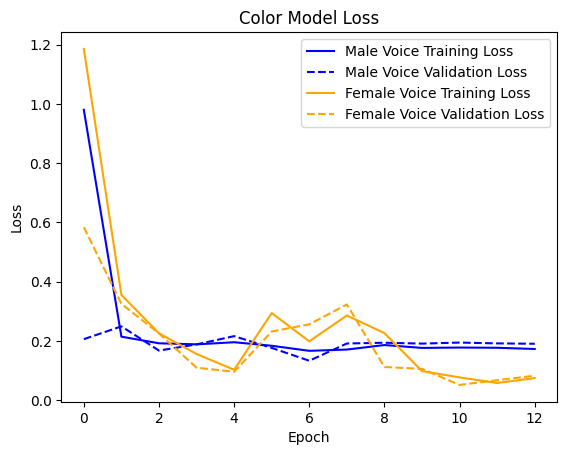

In [16]:
import matplotlib.pyplot as plt

# Assuming you have two history objects: history1 and history2
# Replace these with your actual history objects

# Plot training loss for Model 1
plt.plot(history_obama.history['loss'], label='Male Voice Training Loss', color='blue')

# Plot validation loss for Model 1
plt.plot(history_obama.history['val_loss'], label='Male Voice Validation Loss', linestyle='dashed', color='blue')

# Plot training loss for Model 2
plt.plot(history_taylor.history['loss'], label='Female Voice Training Loss', color='orange')

# Plot validation loss for Model 2
plt.plot(history_taylor.history['val_loss'], label='Female Voice Validation Loss', linestyle='dashed', color='orange')

plt.title('Color Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


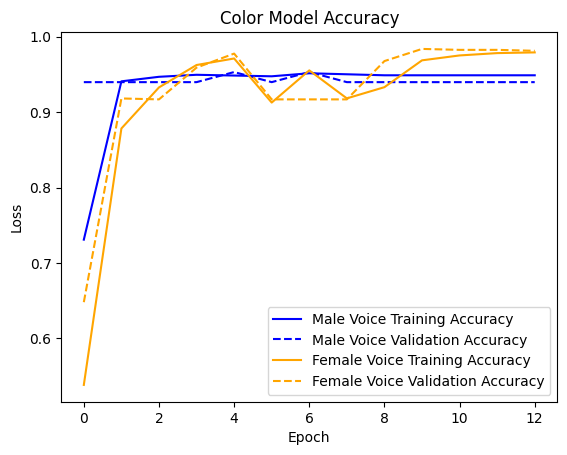

In [15]:
import matplotlib.pyplot as plt

# Assuming you have two history objects: history1 and history2
# Replace these with your actual history objects

# Plot training loss for Model 1
plt.plot(history_obama.history['accuracy'], label='Male Voice Training Accuracy', color='blue')

# Plot validation loss for Model 1
plt.plot(history_obama.history['val_accuracy'], label='Male Voice Validation Accuracy', linestyle='dashed', color='blue')

# Plot training loss for Model 2
plt.plot(history_taylor.history['accuracy'], label='Female Voice Training Accuracy', color='orange')

# Plot validation loss for Model 2
plt.plot(history_taylor.history['val_accuracy'], label='Female Voice Validation Accuracy', linestyle='dashed', color='orange')

plt.title('Color Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Predicting

13/13 [==============================] - 1s 75ms/step
Accuracy: 0.6837
Precision: 0.1842
Recall: 0.1842
AUC: 0.5054
F1-Score: 0.1842
[[254  62]
 [ 62  14]]
AUC Score: 0.5054


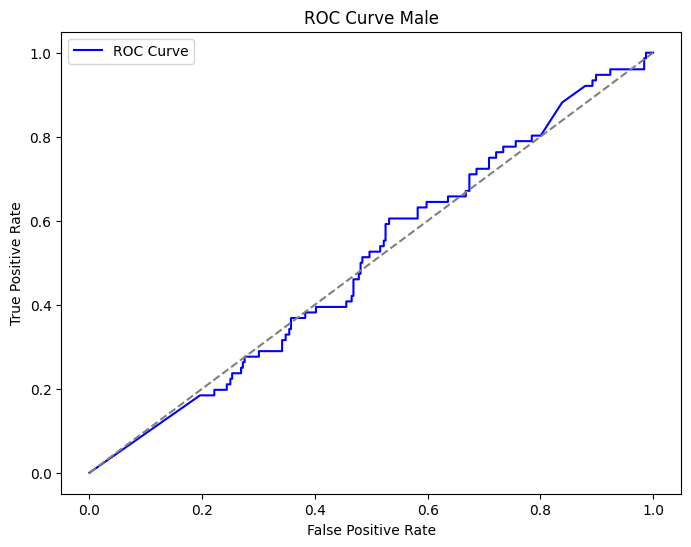

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

predicted_probs_obama = model_obama.predict(test_ds_obama)
predicted_labels_obama = (predicted_probs_obama >= 0.5).astype(int)  # Convert probabilities to binary predictions
actual_labels_obama = np.concatenate([y for x, y in test_ds_obama], axis=0)

accuracy_obama = accuracy_score(actual_labels_obama, predicted_labels_obama)
precision_obama = precision_score(actual_labels_obama, predicted_labels_obama)
recall_obama = recall_score(actual_labels_obama, predicted_labels_obama)
roc_auc_obama = roc_auc_score(actual_labels_obama, predicted_probs_obama)
f1_obama = f1_score(actual_labels_obama, predicted_labels_obama)

print(f"Accuracy: {accuracy_obama:.4f}")
print(f"Precision: {precision_obama:.4f}")
print(f"Recall: {recall_obama:.4f}")
print(f"AUC: {roc_auc_obama:.4f}")
print(f"F1-Score: {f1_obama:.4f}")

# Assuming predicted_probs contains probabilities for the positive class
fpr, tpr, thresholds = roc_curve(actual_labels_obama, predicted_probs_obama[:, 0])  # Use [:, 0] for positive class
auc_score_obama = roc_auc_score(actual_labels_obama, predicted_probs_obama[:, 0])

c_matrix = confusion_matrix(predicted_labels_obama, actual_labels_obama)
print(c_matrix)

print(f"AUC Score: {auc_score_obama:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Male')
plt.legend()
plt.show()

17/17 [==============================] - 2s 87ms/step
Accuracy: 0.5629
Precision: 0.4113
Recall: 0.2886
AUC: 0.5075
F1-Score: 0.3392
AUC Score: 0.5075
Confusion Matrix:
[[233 143]
 [ 83  58]]


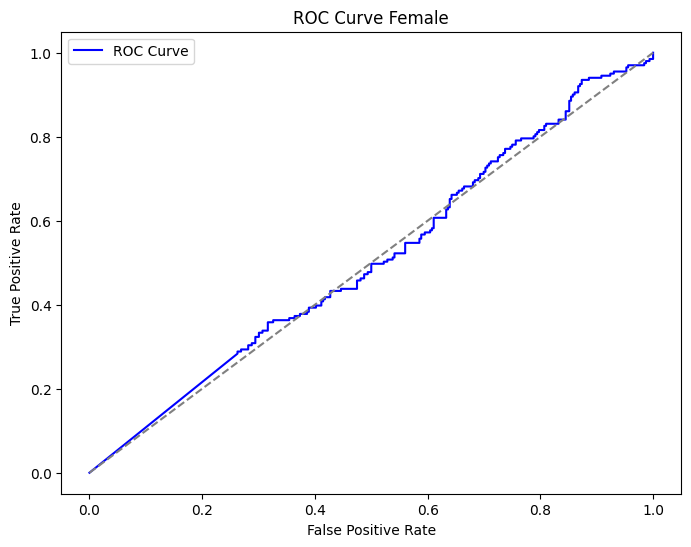

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

predicted_probs = model_taylor.predict(test_ds_taylor)
predicted_labels = (predicted_probs >= 0.5)  # Convert probabilities to binary predictions
actual_labels = np.concatenate([y for x, y in test_ds_taylor], axis=0)

accuracy_taylor = accuracy_score(actual_labels, predicted_labels)
precision_taylor = precision_score(actual_labels, predicted_labels)
recall_taylor = recall_score(actual_labels, predicted_labels)
roc_auc_taylor = roc_auc_score(actual_labels, predicted_probs)
f1_taylor = f1_score(actual_labels, predicted_labels)

print(f"Accuracy: {accuracy_taylor:.4f}")
print(f"Precision: {precision_taylor:.4f}")
print(f"Recall: {recall_taylor:.4f}")
print(f"AUC: {roc_auc_taylor:.4f}")
print(f"F1-Score: {f1_taylor:.4f}")

# Assuming predicted_probs contains probabilities for the positive class
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probs[:, 0])  # Use [:, 0] for positive class
auc_score = roc_auc_score(actual_labels, predicted_probs[:, 0])

print(f"AUC Score: {auc_score:.4f}")

c_matrix = confusion_matrix(predicted_labels, actual_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(c_matrix)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Female')
plt.legend()
plt.show()


In [14]:
accuracy = (accuracy_obama+accuracy_taylor)/2
precision = (precision_obama+precision_taylor)/2
recall = (recall_obama+recall_taylor)/2
roc_auc = (roc_auc_obama+roc_auc_taylor)/2
f1 = (f1_obama+f1_taylor)/2

print(f"Accuracy: {accuracy:.4f}") 
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {roc_auc:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.6233
Precision: 0.2978
Recall: 0.2364
AUC: 0.5064
F1-Score: 0.2617
